In [2]:
from models.ffnn import BrainFFNN
from models.vgg import BrainVGG

2024-03-04 12:51:14.312954: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 12:51:14.353001: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 12:51:14.353057: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 12:51:14.354225: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 12:51:14.360799: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-04 12:51:14.361494: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
ffnn = BrainFFNN()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [3]:
ffnn.train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
hist = ffnn.train(epochs=15)

Epoch 1/15
143/143 [==============================] - 101s 703ms/step - loss: 558.6781 - accuracy: 0.5370 - val_loss: 119.6484 - val_accuracy: 0.5079
Epoch 2/15
143/143 [==============================] - 103s 717ms/step - loss: 56.6733 - accuracy: 0.6864 - val_loss: 43.8797 - val_accuracy: 0.7163
Epoch 3/15
143/143 [==============================] - 102s 715ms/step - loss: 28.7600 - accuracy: 0.7560 - val_loss: 82.2960 - val_accuracy: 0.4930
Epoch 4/15
143/143 [==============================] - 101s 705ms/step - loss: 25.3800 - accuracy: 0.7632 - val_loss: 24.0046 - val_accuracy: 0.7259
Epoch 5/15
143/143 [==============================] - 99s 691ms/step - loss: 17.4683 - accuracy: 0.7923 - val_loss: 21.0772 - val_accuracy: 0.7750
Epoch 6/15
143/143 [==============================] - 97s 677ms/step - loss: 9.4280 - accuracy: 0.8486 - val_loss: 27.8099 - val_accuracy: 0.7662
Epoch 7/15
143/143 [==============================] - 99s 694ms/step - loss: 16.7039 - accuracy: 0.7656 - val_los

In [5]:
ffnn.eval()

41/41 [==============================] - 1s 20ms/step - loss: 23.4602 - accuracy: 0.7414


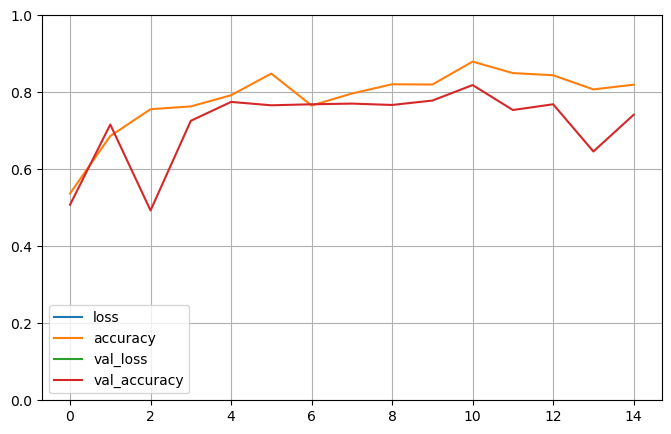

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [12]:
ffnn.model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 65536)             0         
                                                                 
 dense (Dense)               (None, 256)               16777472  
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 4)                 516       
                                                                 
Total params: 16810884 (64.13 MB)
Trainable params: 16810884 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
ffnn.save()

In [3]:
vgg = BrainVGG()

Found 5712 files belonging to 4 classes.
Using 4570 files for training.
Found 5712 files belonging to 4 classes.
Using 1142 files for validation.
Found 1311 files belonging to 4 classes.


In [ ]:
hist = vgg.train(epochs=20)

Epoch 1/20
  4/143 [..............................] - ETA: 3:12:34 - loss: 630.7690 - accuracy: 0.2969

In [ ]:
vgg.eval()

In [ ]:
import pandas as pd

pd.DataFrame(hist.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [4]:
vgg.model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      640       
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
vgg.save()